In [5]:
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.brutto import brutto_gen

#### Assign brutto formulas by default gdf

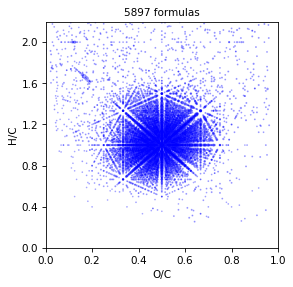

In [6]:
spec = MassSpectrum().load(filename="data/sample2.csv",
                            mapper={'m/z':'mass', 'I':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec = spec.assign()
vk = VanKrevelen(spec.table)
vk.draw_scatter()

#### Assign brutto formulas by custom gdf

For main isotope just it simple. For example, C, H, N, O, Na. It automaticaly take most abudant isotope.
For minor isotopes it is necessery mark isotope with "_". For example, C_13, H_2, Fe_57
Then, after element it is necessary mark range in what it can be in compound. 
For example 
'C':(1,40) means that in compouns it may be from 1 to 39 carbon atoms. 
'H_2':(0:10) means tha in compound it may be from 0 to 9 deterium atoms

In [7]:
gdf = brutto_gen(elems={'C':(1,40),'C_13':(0,10),'H':(0,100), 'O':(0,40),'N':(0,2), 'Fe':(0,2)})
gdf

,C,C_13,H,O,N,Fe,mass
0,1,0,2,0,0,0,14.015650
1,2,0,2,0,0,0,26.015650
2,1,0,1,0,1,0,27.010899
3,1,1,2,0,0,0,27.019005
4,2,0,4,0,0,0,28.031300
...,...,...,...,...,...,...,...
887989,39,9,91,39,1,1,1370.481971
887990,39,9,93,39,1,1,1372.497621
887991,39,9,95,39,1,1,1374.513271
887992,39,9,97,39,1,1,1376.528921


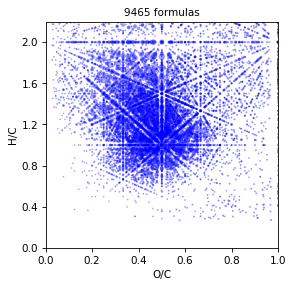

In [8]:
spec = MassSpectrum().load(filename="data/sample2.csv",
                            mapper={'m/z':'mass', 'I':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec = spec.assign(generated_bruttos_table=gdf)
vk = VanKrevelen(spec.table)
vk.draw_scatter()